##This is the notebook that will serve as the first go through of the Pima Native Americans datasets from Kaggle.

<h3>Goals of this project</h3>
- Develop a strong structure to follow, as in a framework so I have the ability to use this a guide for future projects.

- Commit to GitHub so I can track my progress

- Learn how to containerize this later

- Learn how to build this in streamlit

- Foster my intuition on which plots are the best for certain types of data

- Standardize and normalize data quickly

- Feature Engineering ideas

- Deploy to Heroku

- Play with Google Cloud Platform

- Practice modularizing my code to make it easier to use

#Questions

- What kind of data are dealing with - structured or unstructred?
  - Structured data for sure

- Does the data have categorical, numerical, ordinal, or time series data?
  - 

- What are my feature variables (inputs) and what are my target variables (outputs)?

- Are we missing any data?

- Are we dealing with outliers?


#Data Dictionary

* *FYI: Everyone person in this dataset is a woman at age 21 or higher*

| Column | Meaning | Thoughts |
|------- | ------- | -------- |
|Pregnancies | Number of times pregnant | An integer.  What is the min and what is the max?  |
| Glucose | Plasma glucose concentration a 2 hours in an oral glucose tolerance test | Measured in mmol/L?  1 mmol/L = 18 mg/dL.  I need to multiply by 18 to get the measurement for the HOMA IR Score|
|Blood Pressure | Diastolic blood pressure | mm Hg.  Can we figure out the systolic?  The number we are given is the second one -- 120/80 |
|SkinThickness | Triceps skin fold thickness (mm) | This seems kinda normal|
|Insulin | 2 hour serum insuling (muU/ml) | Measured in muU/ml.|
|BMI | Body mass index (weight in kg/(height in meters)<sup>2</sup> | Traditional measurement |
|Diabetes Pedigree | Diabetes Pedigree Function | A function used to determine whether you have diabetes given your family history |
|Age | Age in years| This is a normal whole integer |
|Outcome | Class variable (0 or 1) 268 of 768 are 1, the others are 0|  We have an imbalance so we can handle that but let's start without that|


HOMA - IR Blood Code 
- Insulin * Glucose = HOMA-IR
- Healthy is 0.5 - 1.5
- Less than 1.0 means you are insulin- sensitive, which is optimal
- A range of 1 - 1.9 is within "Normal limits"
- Above 1.9 indicates early insuling resistance
- Above 2.9 indicates significant signal resistance

#Models

What models do I want to use?
  - Random Forrest
  - Lasso
  - SVM
  - Dense network of 2 layers
  - Linear SVC
  - Gradient Boosting


Start with defaults and then try messing with hyperparementers

I will use a handful of architectures and then call all of them "Model 1" and see which does the best

- Model 1
  - No feature engineering, little normalization / standardization

- Model 2
  - Feature engineering to see if it helps

- Model 3
  - Adjust hyperparameters in models

- Model 4
  - A dense network to see how deep learning does

##Import the libraires and then lets get into the data and see what we need to work on

In [1]:
#Import libraries
!pip install wandb -qq

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly as pt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import wandb

from google.colab import files
from google.colab import drive
drive.mount("/content/gdrive")

import os
os.chdir("/content/gdrive/My Drive/Startup Projects/Medical (Democratize)/People/Diabetes-Data/Diabetes Prediction/Pima/Data/")

%matplotlib inline

     |████████████████████████████████| 2.0MB 7.3MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 163kB 36.3MB/s 
     |████████████████████████████████| 133kB 34.8MB/s 
     |████████████████████████████████| 71kB 7.5MB/s 
Mounted at /content/gdrive


In [2]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
def background_check(dataframe):
  print("#" * 100)
  print(dataframe.head())

  print("#" * 100)
  print(dataframe.info())

  print("#" * 100)
  print(dataframe.describe)

  print("#" * 100)
  print(dataframe.tail())

  print("#" * 100)
  print(dataframe.columns)

  print("#" * 100)
  print(dataframe.dtypes)

  print("#" * 100)
  print(dataframe.shape)

background_check(diabetes)

####################################################################################################
   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]
####################################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1 

#What do we need to standardize and normalize?



In [4]:
#We can try a tree method almost immediately since it is insensitive to scale
from sklearn import preprocessing

diabetes_normalized = diabetes.copy()

column = 'Pregnancies'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Glucose'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'BloodPressure'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'SkinThickness'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Insulin'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'BMI'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'Age'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 

column = 'DiabetesPedigreeFunction'
diabetes_normalized[column] = diabetes_normalized[column] / diabetes[column].abs().max() 


print(diabetes_normalized.head())

   Pregnancies   Glucose  ...       Age  Outcome
0     0.352941  0.743719  ...  0.617284        1
1     0.058824  0.427136  ...  0.382716        0
2     0.470588  0.919598  ...  0.395062        1
3     0.058824  0.447236  ...  0.259259        0
4     0.000000  0.688442  ...  0.407407        1

[5 rows x 9 columns]


#Let's Build a Model!

In [5]:
diabetes_normalized.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#What do we need to impute now?  Are there missing data?  Are the classes balanced?  How do we balance them?

#TO DO:
- Split the data into train and test freshly
  - Remeber you have other projects that can help you split this correctly.  Take it simply
- Try to build the dense network from scratch again
  - Remember you have done this before.  You know how to do it. Be patient, you have this.
- Try XGBoost
  - This will be super cool to try


#I need a training set - 80% of the data 
#I need a test set - 20% of the data

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def split_data():
  #train, test = train_test_split(diabetes_normalized[["Pregnancies", "Glucose"]], y = diabetes_normalized["Outcome"] test_size=0.2)

  #Now we need to do a check on the data to make sure the shape is what we know it should be
  #background_check(train)

  #print("-" * 50, " BREAK ", "-" * 50)

  #background_check(test)

  #return train, test
split_data()

NameError: ignored

In [8]:
def dense_network():
  #You have a rank 9 tensor 
  print(diabetes_normalized.shape)

  print(diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].shape)
  print(diabetes_normalized["Outcome"].shape)

  #training_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DibaetesPedigreeFunction", "Age"]].head(614)
  validation_set = diabetes_normalized["Outcome"].tail(154)

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = (768, 8)),                          
      tf.keras.layers.Dense(768, activation = "relu"),
      tf.keras.layers.Dense(128, activation = "relu"),
      tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  model.compile(optimizer = "Adam",
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
  
  model.fit(x = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]],
            y = diabetes_normalized["Outcome"],
            epochs = 300,
            batch_size = 32,
            shuffle = True
           )
  
dense_network()

(768, 9)
(768, 8)
(768,)
Epoch 1/300
24/24 [==============================] - 3s 2ms/step - loss: 0.6734 - accuracy: 0.6197
Epoch 2/300
24/24 [==============================] - 0s 2ms/step - loss: 0.6267 - accuracy: 0.6722
Epoch 3/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.7141
Epoch 4/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7128
Epoch 5/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7328
Epoch 6/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7624
Epoch 7/300
24/24 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7554
Epoch 8/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7717
Epoch 9/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7990
Epoch 10/300
24/24 [==============================] - 0s 2ms/step - loss: 0.4884 - a

In [9]:
def dense_network_with_validation():
  '''
  print(diabetes_normalized.shape)

  print(diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].shape)
  print(diabetes_normalized["Outcome"].shape)

  training_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DibaetesPedigreeFunction", "Age"]].head(614)
  training_labels = diabetes_normalized["Outcome"].head(614)

  print(training_set.shape, "Training set shape: should be (614, 8)")
  print(trainig_labels.shape, "Training labele shape: should be (614,)")

  validation_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].tail(154)
  validaiton_labels = diabetes_normalized["Outcome"].tail(154)

  print(validation_set.shape, "Validation set shape: should be (154, 8)")
  print(validation_labels.shape, "Validation label shape: should be (154,)")
  '''

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = (768, 8)),                          
      tf.keras.layers.Dense(768, activation = "relu"),
      tf.keras.layers.Dropout(0.8),
      #tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])

  history = model.fit(x = diabetes_normalized[["Pregnancies", "Glucose", "SkinThickness", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]],
            y = diabetes_normalized["Outcome"],
            epochs = 300,
            batch_size = 10,
            shuffle = True,
            validation_split = 0.2,
            verbose = 1
           )
  
  model.save("Dense Model working!")
  
  return history

In [10]:
dense_history = dense_network_with_validation()

Epoch 1/300
62/62 [==============================] - 1s 6ms/step - loss: 0.6784 - accuracy: 0.6368 - val_loss: 0.6738 - val_accuracy: 0.6429
Epoch 2/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6536 - val_loss: 0.6690 - val_accuracy: 0.6429
Epoch 3/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6574 - accuracy: 0.6725 - val_loss: 0.6651 - val_accuracy: 0.6429
Epoch 4/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6613 - val_loss: 0.6625 - val_accuracy: 0.6429
Epoch 5/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6734 - val_loss: 0.6603 - val_accuracy: 0.6429
Epoch 6/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6550 - accuracy: 0.6596 - val_loss: 0.6582 - val_accuracy: 0.6429
Epoch 7/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.6458 - val_loss: 0.6566 - val_accuracy: 0.6429
Epoch 8/300
6

In [11]:
dense_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

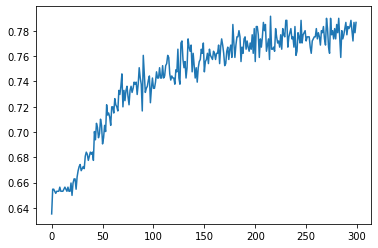

In [12]:
plt.plot(dense_history.history["accuracy"])

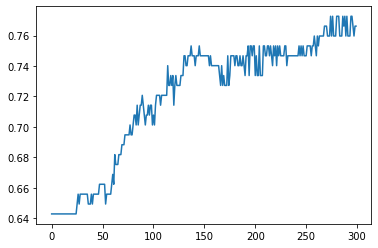

In [13]:
plt.plot(dense_history.history["val_accuracy"])

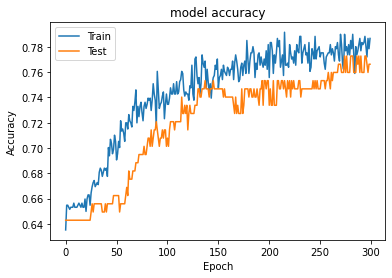

In [14]:
plt.plot(dense_history.history["accuracy"])
plt.plot(dense_history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

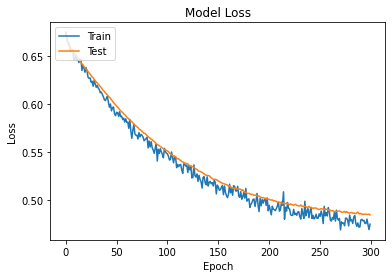

In [15]:
plt.plot(dense_history.history["loss"])
plt.plot(dense_history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [16]:
dense_history.save_weights

NameError: ignored

In [20]:
def dense_network_checkpoints():
  '''
  print(diabetes_normalized.shape)

  print(diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].shape)
  print(diabetes_normalized["Outcome"].shape)

  training_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DibaetesPedigreeFunction", "Age"]].head(614)
  training_labels = diabetes_normalized["Outcome"].head(614)

  print(training_set.shape, "Training set shape: should be (614, 8)")
  print(trainig_labels.shape, "Training labele shape: should be (614,)")

  validation_set = diabetes_normalized[["Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]].tail(154)
  validaiton_labels = diabetes_normalized["Outcome"].tail(154)

  print(validation_set.shape, "Validation set shape: should be (154, 8)")
  print(validation_labels.shape, "Validation label shape: should be (154,)")
  '''

  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = (768, 8)),                          
      tf.keras.layers.Dense(768, activation = "relu"),
      tf.keras.layers.Dropout(0.8),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(0.0001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
  

  from tensorflow.keras.callbacks import ModelCheckpoint

  checkpoint_path = "model_checkpoints/checkpoint"
  checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                               monitor = "val_loss",
                               frequency = "epoch",
                               save_best_only = True,
                               verbose = 1)
  
  history = model.fit(x = diabetes_normalized[["Pregnancies", "Glucose", "SkinThickness", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]],
                      y = diabetes_normalized["Outcome"],
                      epochs = 300,
                      batch_size = 10,
                      shuffle = True,
                      validation_split = 0.2,
                      verbose = 1,
                      callbacks = [checkpoint]
           )
  
  model.save("../Code/")
  
  return history

In [21]:
dense_history_with_checkpoints = dense_network_checkpoints()

Epoch 1/300
62/62 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.5360 - val_loss: 0.6784 - val_accuracy: 0.6429

Epoch 00001: val_loss improved from inf to 0.67838, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 2/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5984 - val_loss: 0.6705 - val_accuracy: 0.6429

Epoch 00002: val_loss improved from 0.67838 to 0.67049, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 3/300
62/62 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6612 - val_loss: 0.6657 - val_accuracy: 0.6429

Epoch 00003: val_loss improved from 0.67049 to 0.66571, saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 4/300
62/62 [==============================] - 0s 3ms/st

In [19]:
!ls -lh model_checkpoint

total 36K
drwx------ 4 root root 4.0K Mar 10 18:44 'Dense Model working!'
-rw------- 1 root root  24K Sep 20  2019  diabetes.csv
drwx------ 3 root root 4.0K Mar 10 18:40  model_checkpoints
drwx------ 2 root root 4.0K Mar 10 17:39  wandb


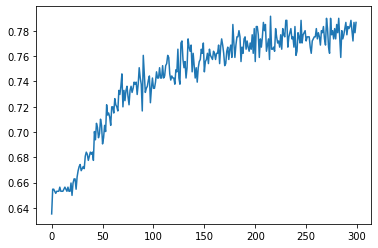

In [22]:
plt.plot(dense_history_with_checkpoints.history["accuracy"])

In [ ]:
plt.plot(dense_history_with_checkpoints.history["accuracy"])

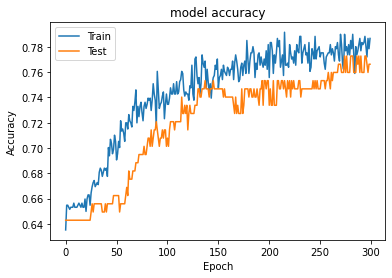

In [23]:
plt.plot(dense_history_with_checkpoints.history["accuracy"])
plt.plot(dense_history_with_checkpoints.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

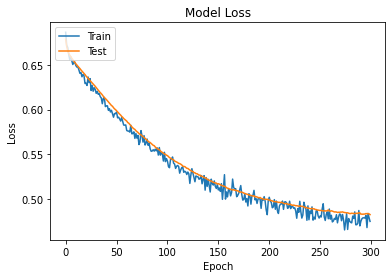

In [24]:
plt.plot(dense_history_with_checkpoints.history["loss"])
plt.plot(dense_history_with_checkpoints.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

#What did I learn?
  - The big background check function is great
  - Use correlations and heatmaps first to develop intuition behind our data and then use that to build charts instead of charts first